# Brief theory

We will be dealing with the discrete optimal transportation problem

\begin{align}
    \label{OT}
    f(X)&=\langle C, X\rangle \rightarrow \min_{X \in U(p, c)},
    \\
    U(p,c)&=\{X\in \mathbb{R}^{n\times n}_+: X\mathbf{1}=p, X^T\mathbf{1}=c\nonumber\},
\end{align}
$ \langle A,B\rangle $ denotes the Frobenius product of matrices defined as $\langle A,B\rangle=\sum\limits_{i,j=1}^n A_{ij}B_{ij}.$
Here

$X$ is the transportation plan and $X_{ij}$ describes how much product we should transport from producer $i$ to consumer $j$,

$C\in\mathbb{R}^{n\times n}_+$ is a given cost matrix, $C_{ij}$ describes how much it costs,

$p,c\in \mathbb{R}^n$ are given elements of the probability simplex. This assumption easilly fulfilled by normalization. $p_i$ describes amount of products producer $i$ can provide.


Summing along rows of $X$ gives $p$, along columns gives $q$.

Form two discrete random measures with support $\subset \{1, \dots, n\}$

# Example

In [1]:
from mnist import MNIST
import numpy as np
from scipy.spatial.distance import cdist
import cv2
import math
import time
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)

In [2]:
n=3

<BarContainer object of 3 artists>

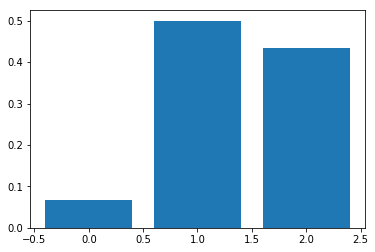

In [3]:
produced_max = 100
p=np.random.randint(produced_max, size=n)
p = np.array(p, dtype=np.float64)/p.sum()
plt.bar(np.arange(n), p , align='center', alpha=1)

<BarContainer object of 3 artists>

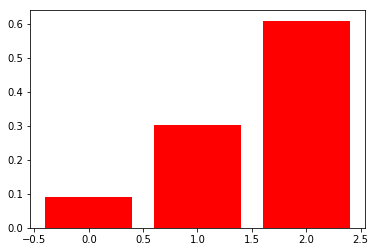

In [4]:
consumed_max = 10
c=np.random.randint(produced_max, size=n)
c = np.array(c, dtype=np.float64)/c.sum()
plt.bar(np.arange(n), c, align='center', alpha=1, color='r')

In [5]:
print(c.sum(), p.sum())

1.0 1.0


Generate simple cost matrix

In [6]:
C = np.zeros([n,n], dtype=np.float64)
for i in range(n):
    for j in range(n):
        C[i,j] = abs(i-j)

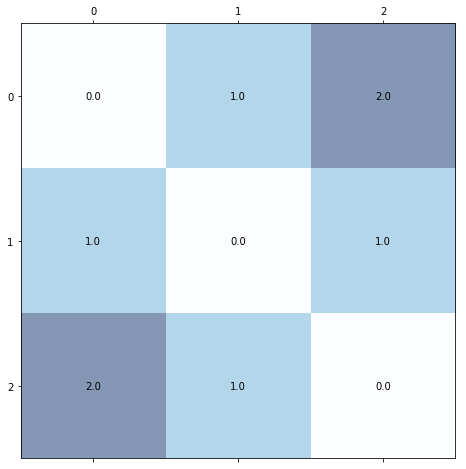

In [7]:
plt.rcParams["figure.figsize"] = (8,8)
fig, ax = plt.subplots()
min_val, max_val = 0, C.max()
intersection_matrix = np.round(C,2)
ax.matshow(intersection_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax.text(i, j, str(im), va='center', ha='center')

In [8]:
import cvxpy as cp

one = np.ones(n, np.float64)

X = cp.Variable([n,n], pos=True)
constraints = [X@one == p] + [X.T@one == c]
objective = cp.Minimize(cp.sum(cp.multiply(X,C)))

prob = cp.Problem(objective, constraints)

prob.solve()


0.1987179487179487

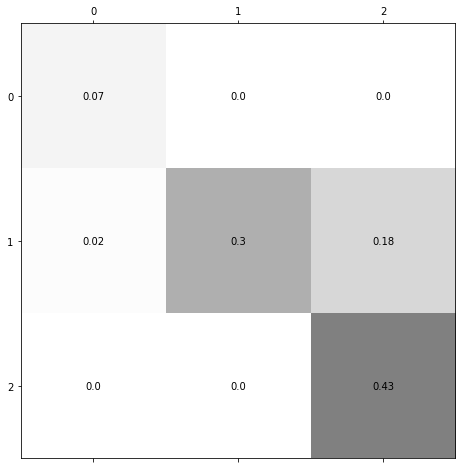

In [9]:
fig, ax = plt.subplots()
min_val, max_val = 0, X.value.max()
intersection_matrix = np.round(X.value,2)
ax.matshow(intersection_matrix, cmap=plt.cm.Greys, alpha=0.5)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax.text(i, j, str(im), va='center', ha='center')

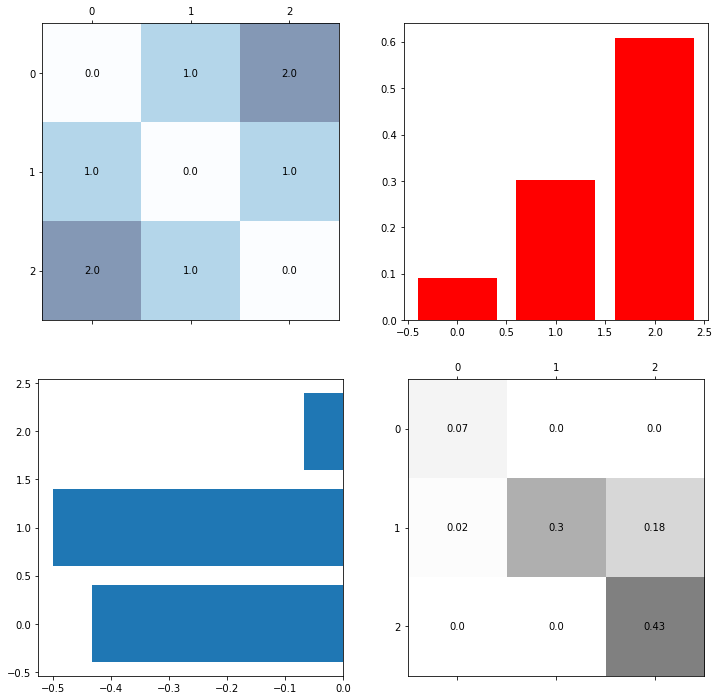

In [10]:
plt.rcParams["figure.figsize"] = (12,12)

fig, ((ax1, ax2), (ax3, ax)) = plt.subplots(2, 2)

ax2.bar(np.arange(n), c , align='center', alpha=1, color='r')

ax3.barh(np.flip(np.arange(n)), -p , align='center', alpha=1)

min_val, max_val = 0, X.value.max()
intersection_matrix = np.round(X.value,2)
ax.matshow(intersection_matrix, cmap=plt.cm.Greys, alpha=0.5)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax.text(i, j, str(im), va='center', ha='center')
        


min_val, max_val = 0, C.max()
intersection_matrix = np.round(C,2)
ax1.matshow(intersection_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax1.text(i, j, str(im), va='center', ha='center')       

Next we continue with gray images.
Let 2d-array $P$ be an image, so $P_{ij}$ describes brightness or  intensity of $ij$ pixel.

But we need transform a picture to a stochastic measure in order to fulfill problem staement.



# Discretization of continuous measures

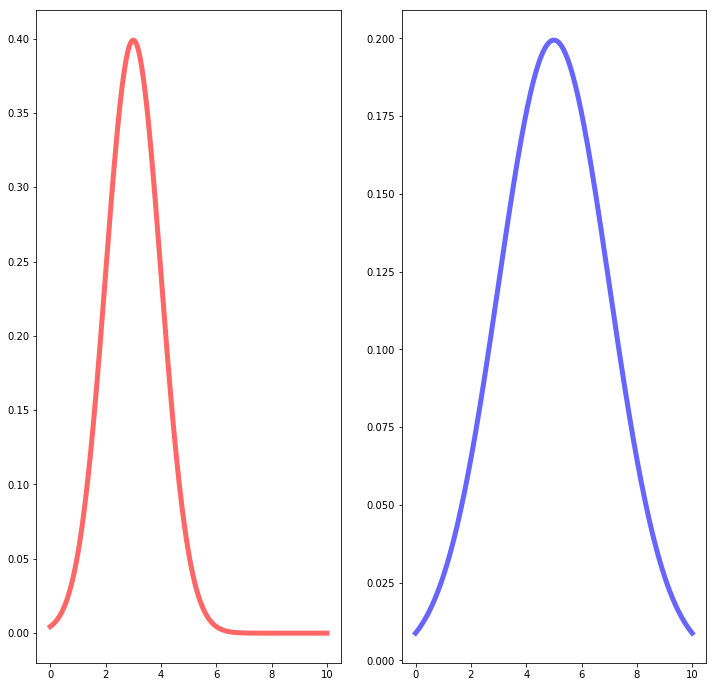

In [11]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)

x = np.linspace(0, 10, 300)
p = norm(3,1).pdf(x)
c = norm(5,2).pdf(x)

ax1.plot(x, p, 'r-', lw=5, alpha=0.6, label='mu=5, sigma=1')
ax2.plot(x, c, 'b-', lw=5, alpha=0.6, label='mu=1, sigma=5')


In [12]:
p = p/p.sum()
c = c/c.sum()

In [13]:
n=len(x)
C = np.zeros([n,n], dtype=np.float64)
for i in range(n):
    for j in range(n):
        C[i,j] = abs(i-j)**2

In [14]:
one = np.ones(n, np.float64)


import cvxpy as cp
X = cp.Variable([n,n], pos=True)

constraints = [X@one == p] + [X.T@one == c] 
objective = cp.Minimize(cp.sum(cp.multiply(X,C)))

prob = cp.Problem(objective, constraints)

prob.solve()

4056.554257792125

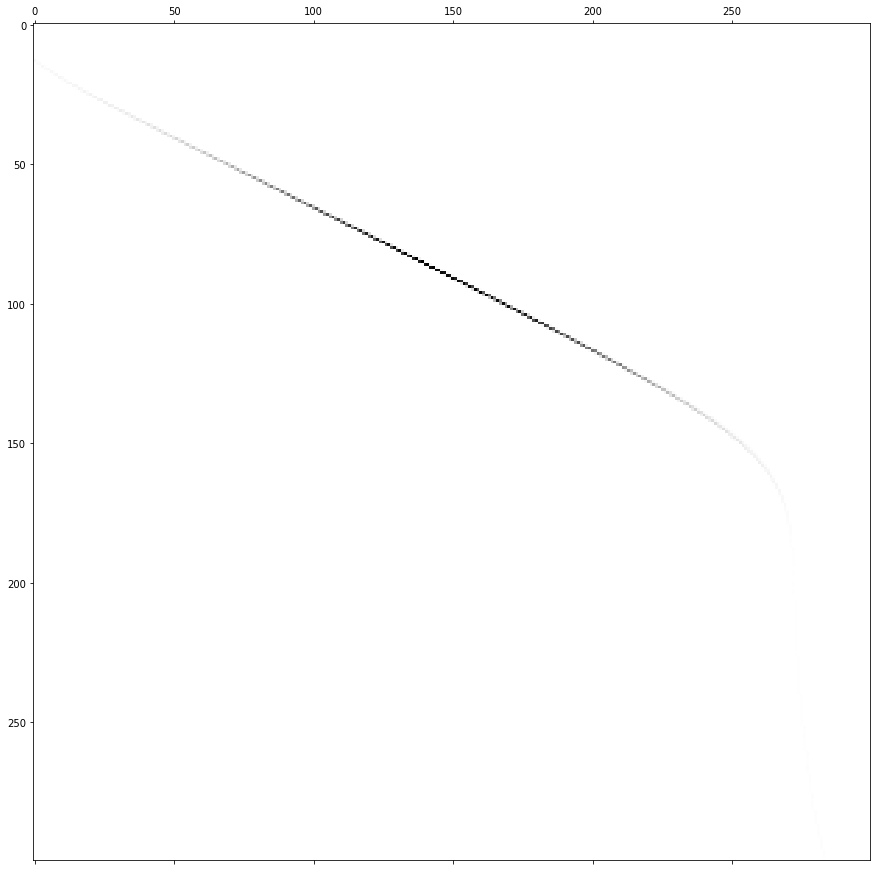

In [15]:
plt.rcParams["figure.figsize"] = (15,15)
plt.matshow(X.value, cmap=plt.cm.Greys)

# MNIST dataset

In [76]:
# https://pypi.org/project/python-mnist
mndata = MNIST('./python-mnist/data')
images_all, labels_all = mndata.load_training()

In [77]:
images_all = np.array(images_all)
images = images_all

Images already stores as vectors:

In [18]:
images[0].shape

(784,)

Reshape and plot some images

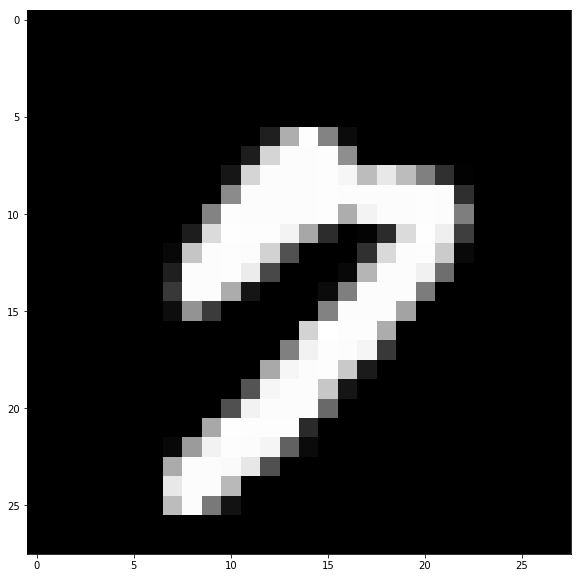

In [19]:
l = len(images)
_n = len(images[0])
_m = int(np.sqrt(_n))
from IPython.display import clear_output
plt.rcParams["figure.figsize"] = (10,10)
for i in np.random.randint(l, size=30):
    plt.imshow(images[i].reshape(-1, _m), cmap=plt.get_cmap('gray'))
    plt.show()
    clear_output(wait = True)

But firstly, let's practise with small images.

The following function does image reshaping and normalization, that problem statement requires.

In [20]:
side_size = int(_m/8) 
n=side_size*side_size

def generate_img(i, m):
    p = np.float64(images[i])
    p = cv2.resize(p.reshape(-1, _m), (m, m))
    p = p.reshape(-1)
    return p / sum(p)

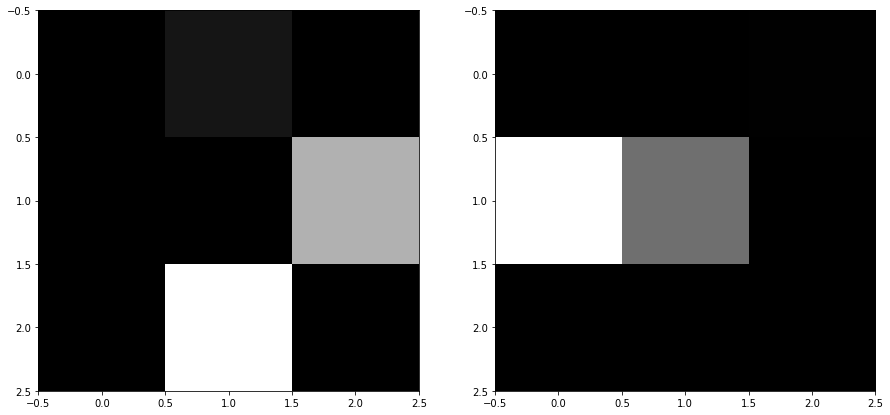

In [21]:
p, c = generate_img(1, side_size), generate_img(2, side_size)

plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(121)
plt.imshow(p.reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(c.reshape(-1, side_size), cmap=plt.get_cmap('gray'))

The following two functions alow to generate euclidean cost matrix 

In [22]:
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

def generate_costs(m, metric='l2'):
    C = np.arange(m)
    C = cartesian_product(C, C)
    C = cdist(C, C)
    return C

In [23]:
C = generate_costs(side_size)

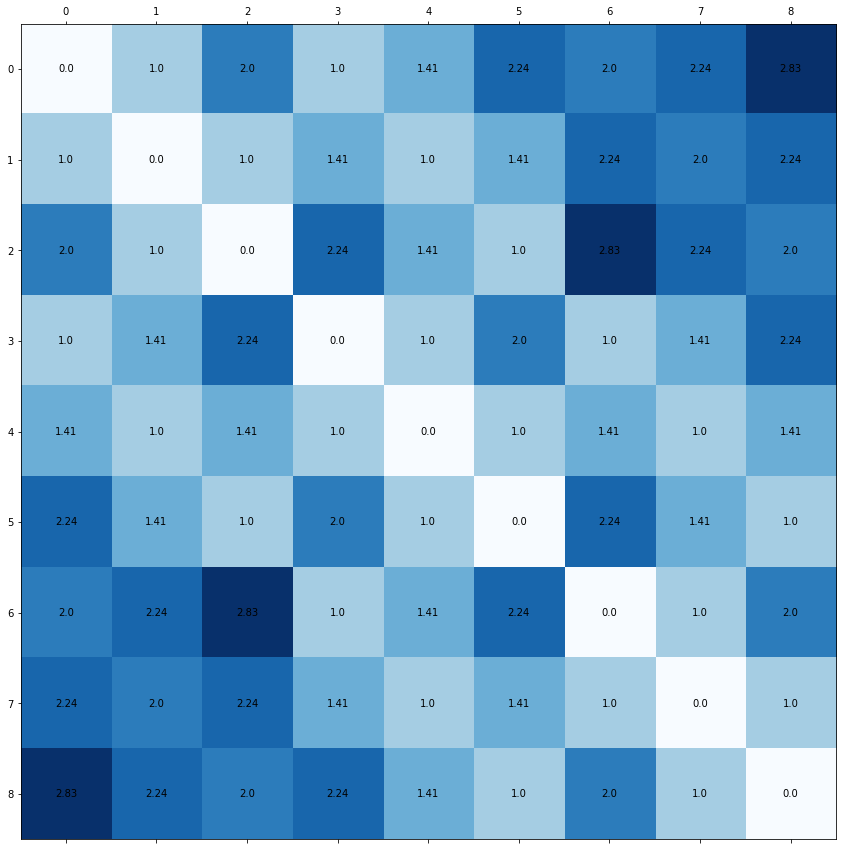

In [24]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
min_val, max_val = 0, C.max()
intersection_matrix = np.round(C,2)
ax.matshow(intersection_matrix, cmap=plt.cm.Blues)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax.text(i, j, str(im), va='center', ha='center')

Let's understand the structure of the matrix C

For doing this, form an array which entry consists of its indices

In [25]:
img = np.chararray((side_size,side_size), itemsize=3)
for i in np.arange(1,side_size+1):
    for j in np.arange(1, side_size+1):
        img[i-1,j-1]=str(i)+','+str(j)

Now we can see how reshape works

In [26]:
img.reshape(-1, n)

chararray([[b'1,1', b'1,2', b'1,3', b'2,1', b'2,2', b'2,3', b'3,1',
            b'3,2', b'3,3']], dtype='|S3')

So $ij$ entry of 2d array moves to $i*side\_size + j$ entry of 1d array.

Pick two random pair of indidces, the first is pair for $p$, the other for $c$

In [27]:
p_inds = np.random.randint(0, side_size, 2)
q_inds = np.random.randint(0, side_size, 2)

Find Euclidean distance between these two points

In [28]:
dist = (p_inds[0] - q_inds[0])**2 + (p_inds[1] - q_inds[1])**2
dist = np.sqrt(dist)
print(dist)

1.4142135623730951


Look how it matches with the corresponding entry of $C$

In [29]:
C[p_inds[0]*side_size + p_inds[1], q_inds[0]*side_size + q_inds[1]]

1.4142135623730951

Now let's solve our problem with cvxpy


In [30]:
one = np.ones(n, np.float64)

X = cp.Variable([n,n], pos=True)

constraints = [X@one == p] + [X.T@one == c] 
objective = cp.Minimize(cp.sum(cp.multiply(X,C)))

prob = cp.Problem(objective, constraints)

prob.solve()

1.33688825911321

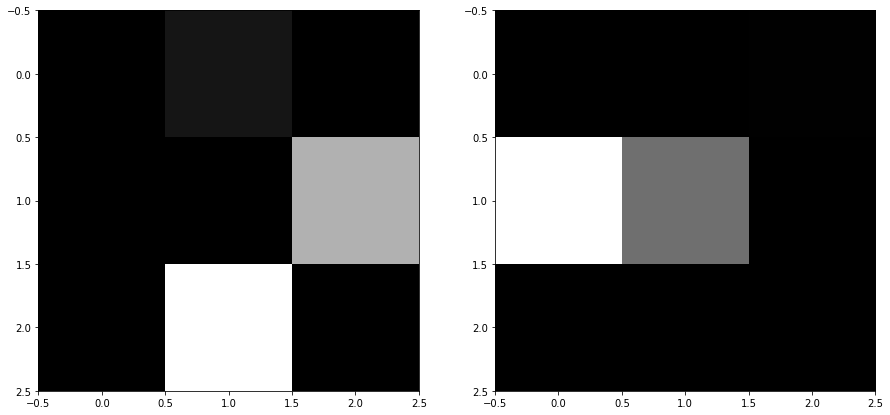

In [31]:
plt.subplot(121)
plt.imshow(X.value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow((X.value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))

In [32]:
# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(X.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)
print("Constraint residual is")
print(prob.constraints[0].violation())


The optimal value is 1.33688825911321
A solution x is
[[8.08480738e-07 8.08480738e-07 0.00000000e+00 2.68407511e-06
  0.00000000e+00 8.08480737e-07 8.08480738e-07 8.08480738e-07
  8.08480738e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.79435804e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [8.08480737e-07 8.08480737e-07 0.00000000e+00 2.68407511e-06
  0.00000000e+00 8.08480738e-07 8.08480737e-07 8.08480738e-07
  8.08480738e-07]
 [8.08480737e-07 8.08480737e-07 0.00000000e+00 2.68407511e-06
  0.00000000e+00 8.08480737e-07 8.08480737e-07 8.08480737e-07
  8.08480738e-07]
 [8.08480738e-07 8.08480738e-07 0.00000000e+00 2.68407511e-06
  0.00000000e+00 8.08480739e-07 8.08480737e-07 8.08480737e-07
  8.08480737e-07]
 [2.68407511e-06 2.68407511e-06 3.39194062e-03 8.42967666e-02
  3.02514364e-01 2.68407511e-06 2.68407511e-06 2.68407511e-06
  2.68407511e-06]
 [8.08480738e-07 8.08480737e-07 0.00000000e+00 2.68407511e-06
  0.00000000e+00 8.08480737e-07

# Return to full-size image. Almost.

Сalculate OT distance for full size image is too long with cvxpy

In [33]:
side_size = int(_m/2) 
n=side_size*side_size
C=generate_costs(side_size)

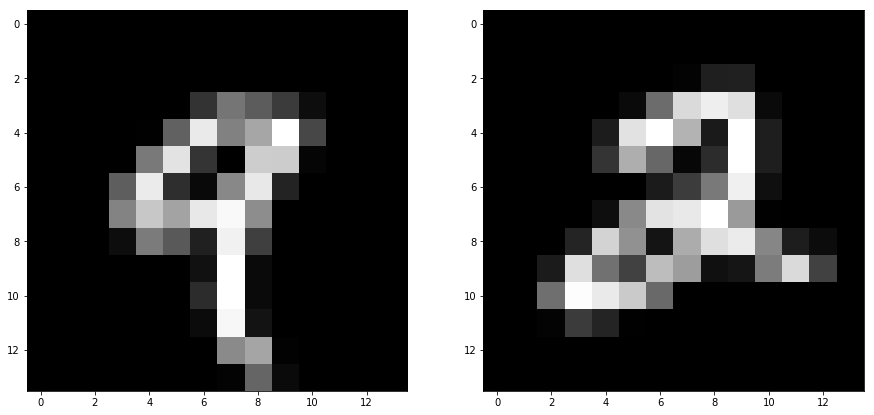

In [34]:
p, c = generate_img(4, side_size), generate_img(5, side_size)
plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(121)
plt.imshow(p.reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(c.reshape(-1, side_size), cmap=plt.get_cmap('gray'))

In [35]:
one = np.ones(n, np.float64)

X = cp.Variable([n,n], pos=True)

constraints = [X@one == p] + [X.T@one == c] 
objective = cp.Minimize(cp.sum(cp.multiply(X,C)))

prob = cp.Problem(objective, constraints)

prob.solve()

1.216012304110911

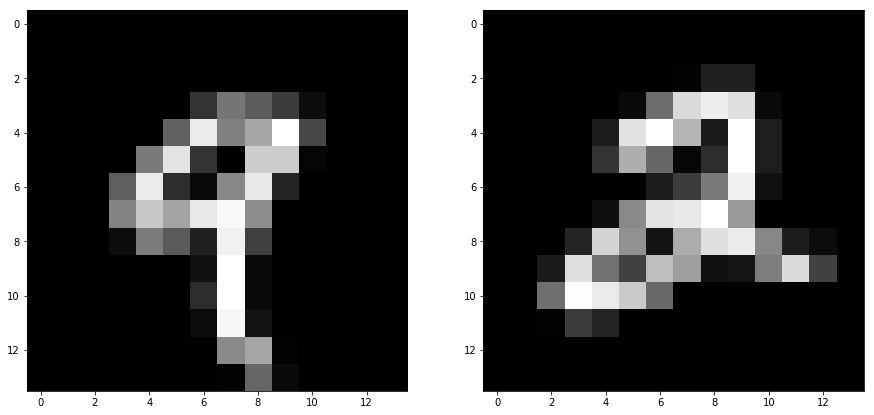

In [36]:
plt.subplot(121)
plt.imshow(X.value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow((X.value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))

Let's now calculate trasportation costs between the same digits

In [37]:
#chosing digit
digit = 1
labels = np.array(labels_all)
images = images_all[labels==digit]

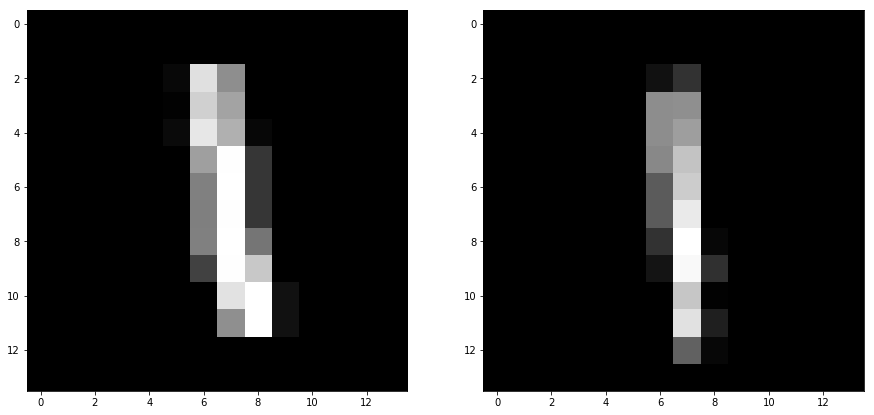

In [38]:
p, c = generate_img(1, side_size), generate_img(2, side_size)

plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(121)
plt.imshow(p.reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(c.reshape(-1, side_size), cmap=plt.get_cmap('gray'))

In [39]:
constraints = [X@one == p] + [X.T@one == c]

prob = cp.Problem(objective, constraints)

prob.solve()

0.4134387831967245

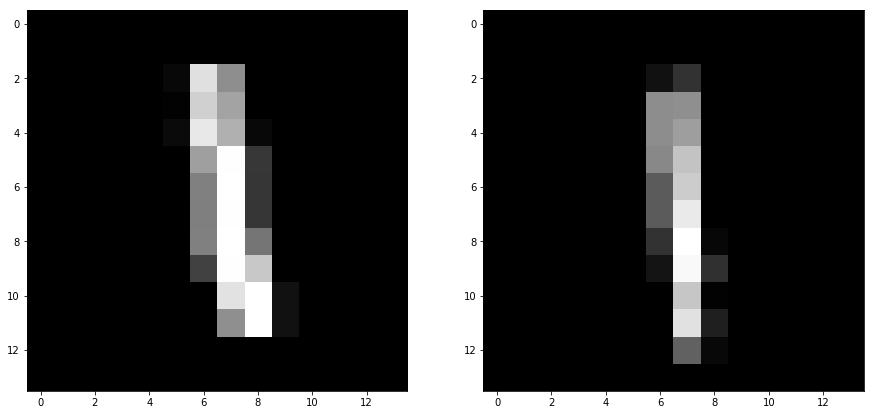

In [40]:
plt.subplot(121)
plt.imshow(X.value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow((X.value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))

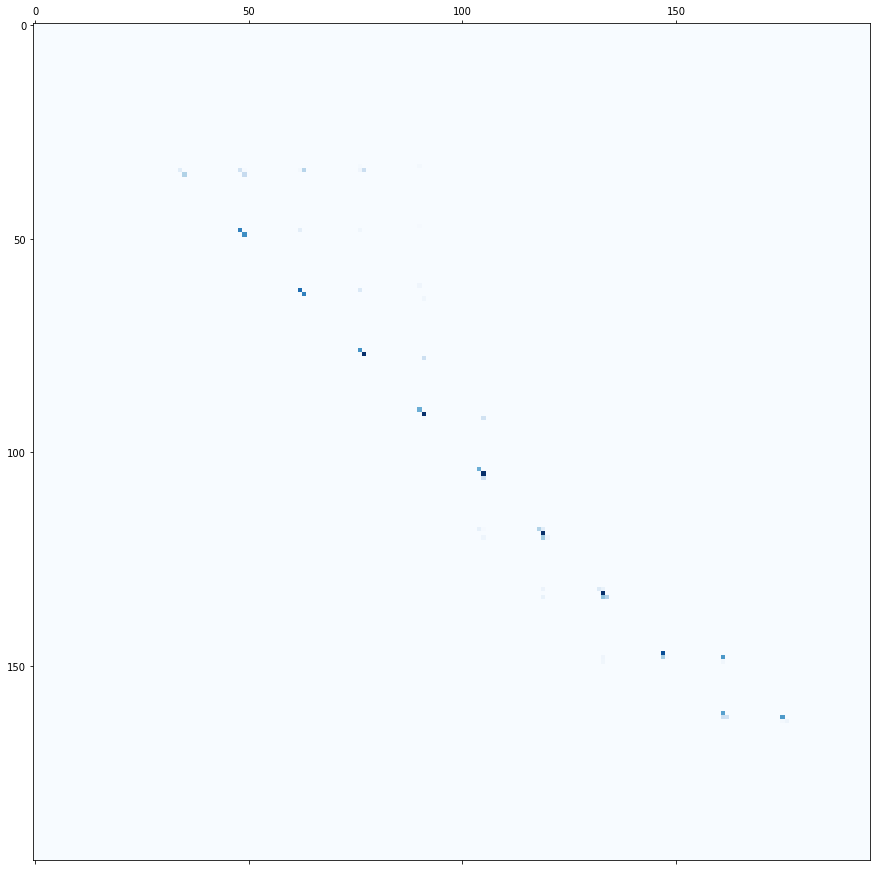

In [41]:
plt.matshow(X.value, cmap=plt.cm.Blues)

# Regularization

In [42]:
one = np.ones(n, np.float64)

X = cp.Variable([n,n], pos=True)

constraints = [X@one == p] + [X.T@one == c] 
objective = cp.Minimize(cp.sum(cp.multiply(X,C)) - cp.sum(cp.entr(X)))
#objective = cp.Minimize(cp.sum(cp.multiply(X,C)) + cp.power(cp.norm(X, 'fro'), 2))

prob = cp.Problem(objective, constraints)

prob.solve()

-4.083433382253428

In [43]:
def f_(gamma, x):
    y = (x.reshape(-1)).copy()
    y[x.reshape(-1) == 0.] = 1.
    y = y.reshape(n, -1)
    #return (C * x).sum() + gamma * (x * np.log(y)).sum()    
    return (C * x).sum() + gamma * (x * x).sum()

In [44]:
f_(1, X.value)

1.1988465193143365

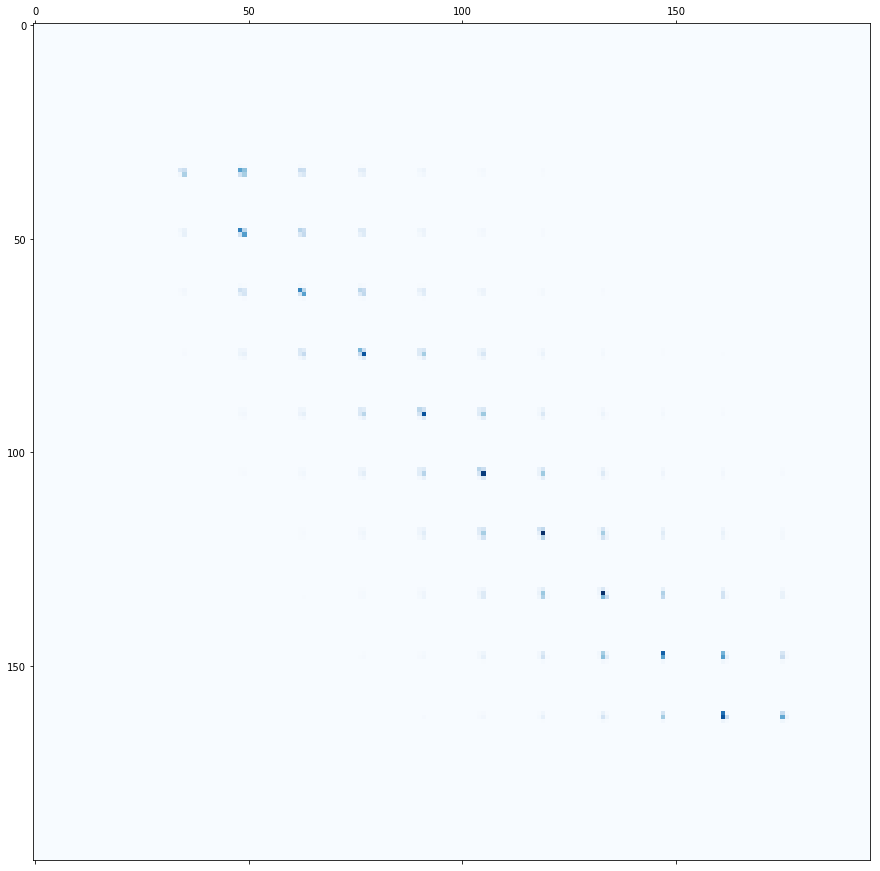

In [45]:
plt.matshow(X.value, cmap=plt.cm.Blues)

In [46]:
import scipy as sp
sp.stats.entropy(X.value).sum()

826.1261663763627

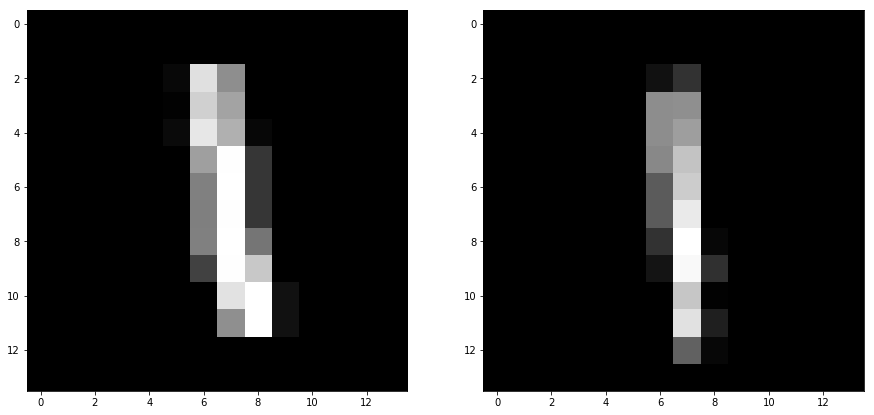

In [47]:
plt.subplot(121)
plt.imshow(X.value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow((X.value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))

# Sinkhorn's algorithm

In [48]:
def f_(gamma, x):
    y = (x.reshape(-1)).copy()
    y[x.reshape(-1) == 0.] = 1.
    y = y.reshape(n, -1)
    return (C * x).sum() + gamma * (x * np.log(y)).sum()

In [49]:
def B_(gamma, la, mu):
    B = np.exp((-C/gamma + np.outer(la, one) + np.outer(one, mu)))
    return B

def phi_(gamma, la, mu):
    B = B_(gamma, la, mu)
    s = B.sum()
    return -la.dot(p) - mu.dot(c) + np.log(s)

def sinkhorn(gamma, stop_obj_val, stop_constr_res):
    u = np.zeros(n, np.float64)
    v = np.zeros(n, np.float64)
    k=0
    
    B = B_(gamma, u , v)
    while True:
        if k%2==0:
            u+=np.log(p) - np.log(B.dot(one))        
        else:
            v+=np.log(c) - np.log(B.T.dot(one))
        
        B = B_(gamma, u , v)
        B /= B.sum()
        if f_(gamma, B) < stop_obj_val and abs(B.dot(one)-p).sum() + abs(B.T.dot(one)-c).sum() < stop_constr_res:
            break
        k+=1
    return B

The algorithm calculates $log(p_i)$, so we need to ensure $p_i > 0$

In [50]:
p+=1e-5
p=p / p.sum()
c+=1e-5
c=c / c.sum()
print(p.sum(), c.sum())

1.0000000000000002 1.0000000000000002


Let's compare what is faster

In [51]:
gamma=0.1
C = generate_costs(side_size)

In [52]:
start_time = time.perf_counter()
constraints = [X@one == p] + [X.T@one == c] 
objective = cp.Minimize(cp.sum(cp.multiply(X,C)) - gamma*cp.sum(cp.entr(X)))
prob = cp.Problem(objective, constraints)
prob.solve()
cvxpy_time = time.perf_counter() - start_time

In [53]:
res = prob.constraints[0].violation().sum() + prob.constraints[1].violation().sum() 

start_time = time.perf_counter()
B = sinkhorn(gamma, prob.value, res)
sinkhorn_time = time.perf_counter() - start_time

In [54]:
print('cvxpy time:\t', cvxpy_time, '\t\tsinkhorn time:\t  ', sinkhorn_time)
print('cvxpy value:\t', prob.value, '\t\tsinkhorn value:\t  ', (B*C).sum())
print('cvxpy residual:\t', res, '\tsinkhorn residual:', abs(B.dot(one)-p).sum() + abs(B.T.dot(one)-c).sum())

cvxpy time:	 13.199936322998838 		sinkhorn time:	   7.986136532999808
cvxpy value:	 0.04881358904934075 		sinkhorn value:	   0.4202347840062207
cvxpy residual:	 1.2804258550310293e-05 	sinkhorn residual: 1.277192194150056e-05


# Barycenters

In [86]:
#chosing digit
digit = 8
images = images_all[labels==digit]

In [106]:
def generate_img(i, m):
    p = np.float64(images[i])
    p+=1e-5
    p = cv2.resize(p.reshape(-1, _m), (m, m))
    p = p.reshape(-1)
    return p / sum(p)

In [107]:
p=[]
side_size=int(_m/2)
M=5
for i in np.random.randint(0,len(images), M):
        p.append(generate_img(i, side_size))

In [93]:
n=side_size**2
C =generate_costs(side_size)
one = np.ones(n, np.float64)

In [121]:
start_time = time.perf_counter()
X=[]


constraints =[]
expression=0
for i in range(M):
    X.append( cp.Variable( [n,n], pos=True))
    constraints += [X[i]@one == p[i]]
    expression=expression+cp.sum(cp.multiply(X[i], C))
for i in range(M-1):
    constraints += [X[i].T@one == X[i+1].T@one]
    
objective = cp.Minimize(expression)
prob = cp.Problem(objective, constraints)
prob.solve()

cvxpy_time = time.perf_counter() - start_time

time:  154.7710759190013


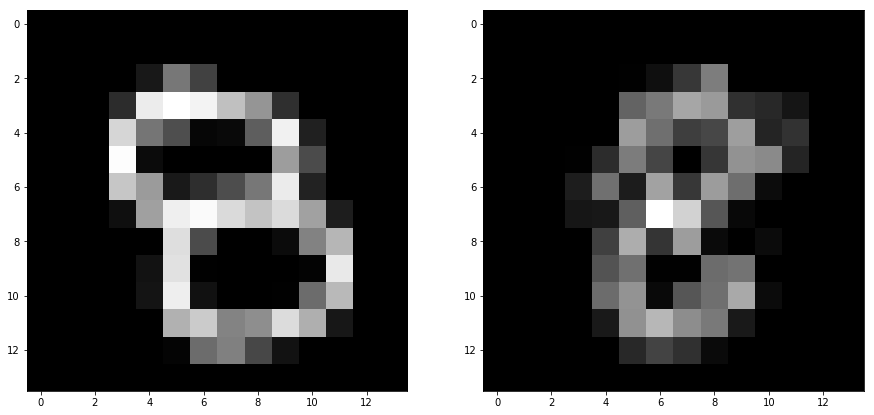

In [104]:
for i in range(M):
    plt.subplot(121)
    plt.imshow(X[i].value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
    plt.subplot(122)
    plt.imshow((X[i].value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
    plt.show()
    clear_output(wait = True)

In [108]:
collect_stat = False
def f_(X):
    return np.einsum('k,kij,ij->', weights, X, C)

def f_true_(X):
    Y = X
    Y[X==0] = 1.
    return np.einsum('k,kij,ij->', weights, X, C) + gamma*np.einsum('k,kij,kij', weights, X, np.log(Y))

def phi_(u, v):
    return np.einsum('k,k', weights, np.log(np.einsum('ki,ij,kj->k', np.exp(u),K,np.exp(v))) - np.einsum('ki,ki->k', u, p))

def argmin_u_(u, v):
    #return np.log(p) - np.log(np.einsum('ki,ij,kj->ki', np.exp(u), K, np.exp(v)))
    return u + np.log(p) - np.log(np.einsum('ki,ij,kj->ki', np.exp(u), K, np.exp(v)))

def argmin_v_(u, v):
    return np.einsum('k,ki->i', weights, np.log(np.einsum('ij,ki->kj', K, np.exp(u)))) - np.log(np.einsum('ij,ki->kj', K, np.exp(u)))    

In [117]:
def update_progress(progress, info=''):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100) + '\n' + info
    print(text)

def IBP(eps):
    v = np.zeros([M,n], np.float64)
    u = np.zeros([M,n], np.float64)
    primal=np.zeros([M, n, n], np.float64)
    i=0
    accuracy = eps+1
    while accuracy > eps:
        if i%2 == 1:
            v=argmin_v_(u, v)
        else:
            u=argmin_u_(u, v)
        i+=1
        
        primal = np.einsum('ki,ij,kj->kij',np.exp(u),K,np.exp(v))
        primal = np.einsum('kij,k->kij', primal, 1/np.einsum('kij->k',primal))
        
        if i%2==1:
            BTone = np.einsum('kij->kj', primal)
            q = np.einsum('k,kj->j', weights, BTone)
            accuracy = np.einsum('k, kj->', weights, abs(BTone - q))
            update_progress(eps/accuracy, str(accuracy) + ' ' + str(eps))
    return primal

In [118]:
eps = 1.12
gamma = eps/4/np.log(n)
epsprime = eps/4/C.max()
K = np.exp(-C/gamma)
weights = 1/M * np.ones(M, np.float64)

B = IBP(epsprime)

Progress: [####################] 100.0%
0.015156870424833062 0.015229992210171794


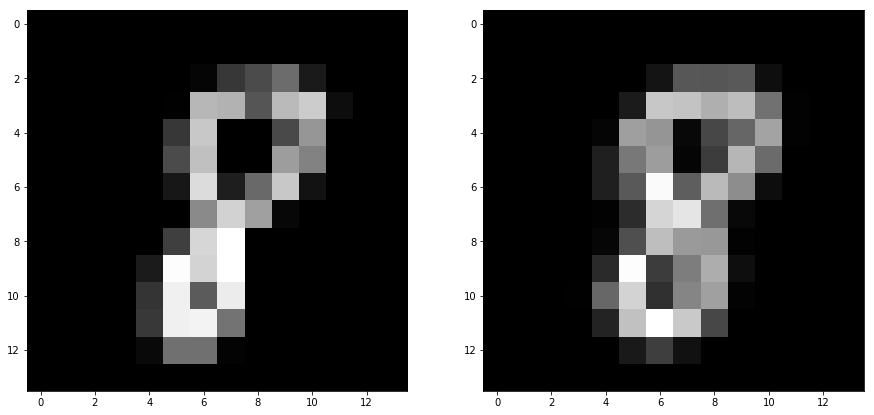

In [120]:
for i in range(M):
    plt.subplot(121)
    plt.imshow(B[i].dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
    plt.subplot(122)
    plt.imshow((B[i]).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
    plt.show()
    clear_output(wait = True)

In [ ]:
print('cvxpy time:\t', cvxpy_time, '\t\tsinkhorn time:\t  ', sinkhorn_time)